In [1]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
from core_functions import *
import os

In [2]:
dbn = dropdown()
display(dbn)
filename = filename_groups()
display(filename)
filenameGO = filename_GO()
display(filenameGO)
mngene = min_gene_intersected()
display(mngene)
fs = pval_thres()
display(fs)
try:
    os.stat('../results/')
except:
    os.mkdir('../results/')       

Select the database to perform the functional enrichment:


A Jupyter Widget

Select the groups file


A Jupyter Widget

OPTIONAL - Select a file with list of gene sets to enrich (filter):


A Jupyter Widget

Minimum of genes intersecting gene set


A Jupyter Widget

Corrected P-value (Q-value) threshold


A Jupyter Widget

## Functional enrichment

Working on.... cluster0
Working on.... cluster1
Working on.... cluster2
Working on.... cluster3
Working on.... cluster4
Working on.... cluster7
Working on.... cluster9


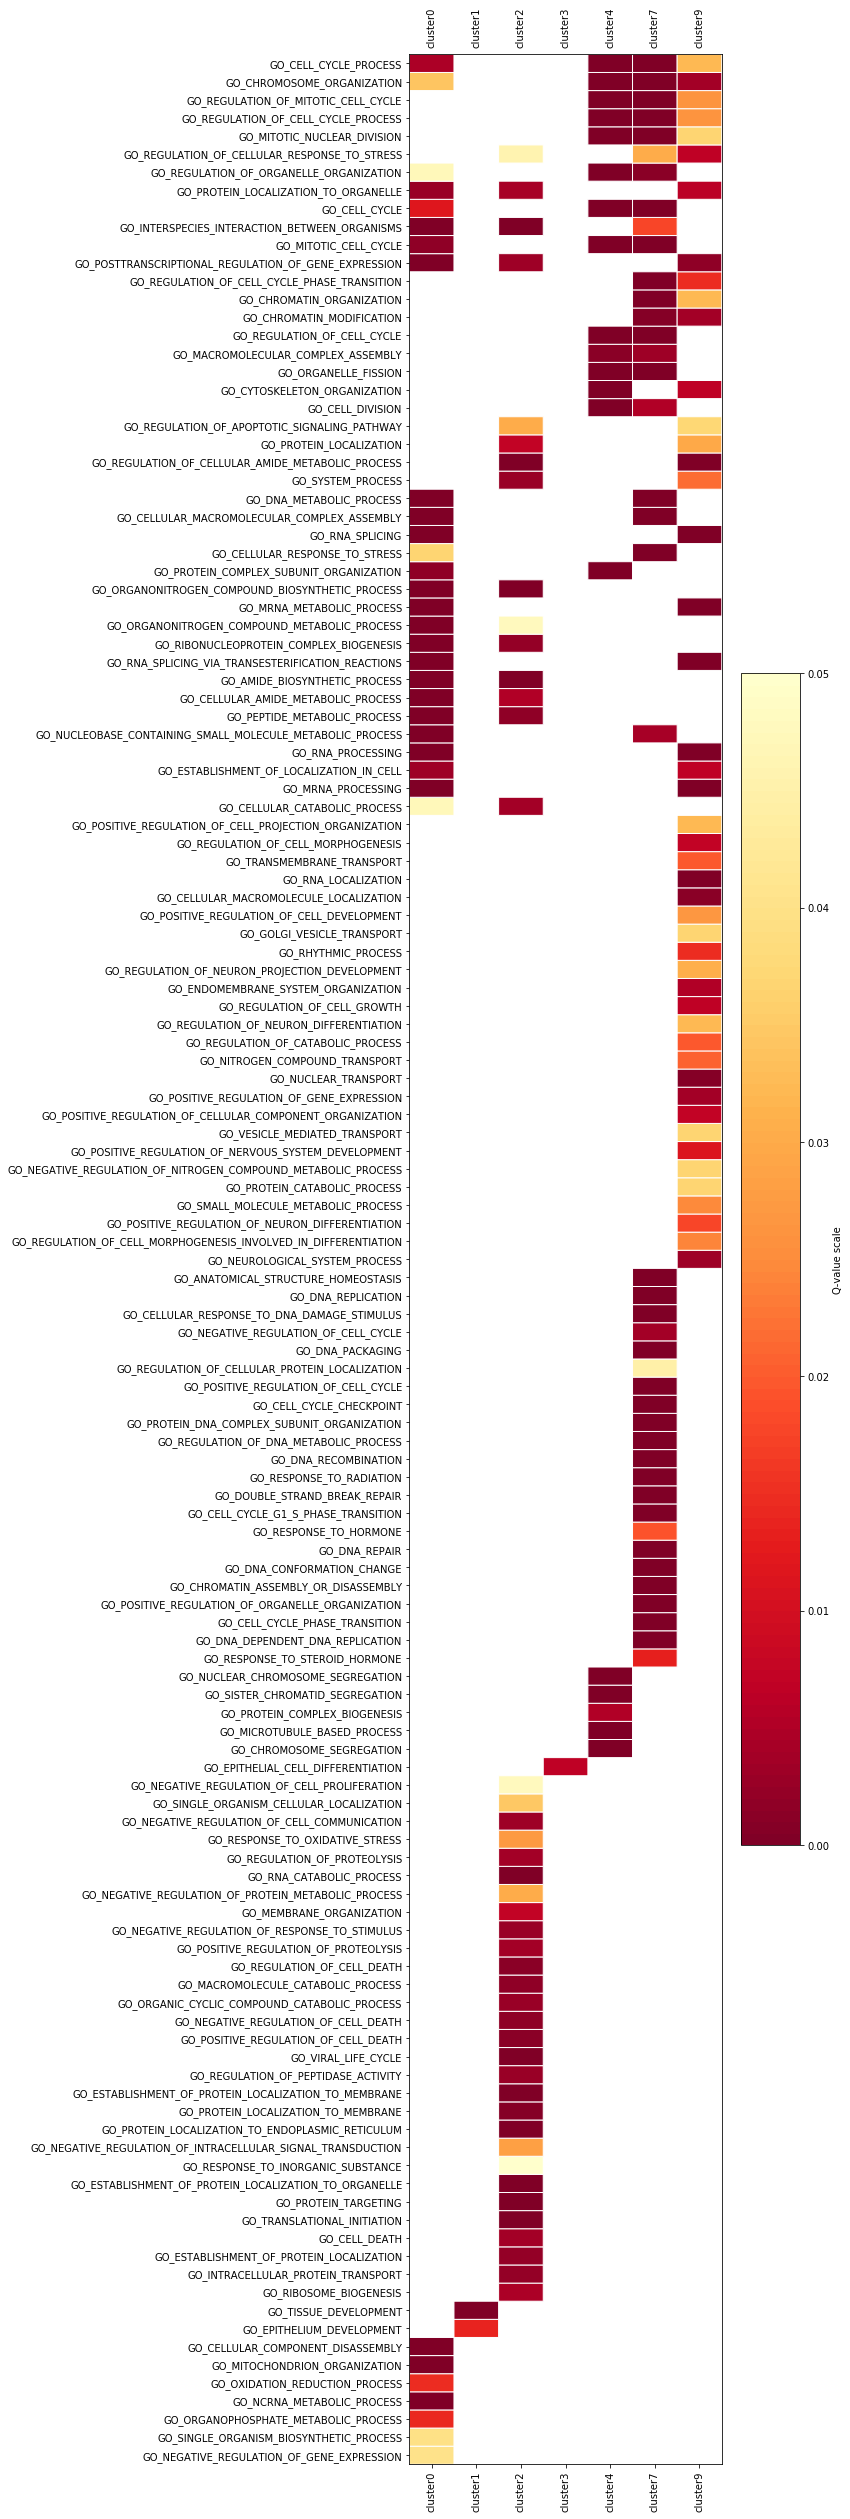

In [4]:
if filename.value == 'No_file':
    print('PLEASE SPECIFY A GROUP FILE. It should be in data/ folder')
else:
    #Load data
    allgenes,genesets,cluster_genes,clusters = load_data(filename.value,dbn.value)
    
    #Generate Gitools heatmap
    generate_gitools_matrix(cluster_genes,filename.value)

    #Functional enrichment
    allenrichment_results = enrichment_all_groups(genesets,mngene.value,filenameGO.value,allgenes,cluster_genes,float(fs.value))

    #Plot heatmap
    plot_heatmap(allenrichment_results,clusters,cluster_genes,float(fs.value))

    #Generate tabe with all results
    allenrichment_results[['GROUP','TERM','TERM_GENE_SET_SIZE','PVALUE','QVALUE','ENRICHED_GENES']].to_excel('../results/'+filename.value.split('.')[0]+'_'+dbn.value.replace('.gmt','')+'.xls',index=False)

## Check genes in a particular gene set

In [4]:
gs = dropdown_gene_set(allenrichment_results)
display(gs)

Select a gene set to check the genes contained in it


A Jupyter Widget

In [5]:
print('Genes in',gs.value,'gene set:')
for g in genesets[gs.value]:
    print(g)

Genes in GO_SENSORY_PERCEPTION gene set:
OR10X1
GJD2
ATP6V1B1
CDH3
POU4F3
OR4F3
CST1
RGR
OR2T7
OR2F2
PDE6G
OR2T6
SFRP5
OR6B3
GNAT2
SCNN1B
OR1S1
GABRB3
OR2F1
USH2A
OR10V1
OR51F2
TAS2R45
ABLIM1
OR51T1
OR1Q1
OR6C68
PDZD7
OR2W5
B3GNT2
OR51A2
OR2T8
OPN5
KCND2
MYO15A
HOMER2
OR4K5
OTOG
OR13C7P
OR10AG1
LRIG2
LHFPL5
EPHB1
OR2A14
KCNK4
ANO1
TULP1
OR2T35
OR4D1
OR52P1P
CHRNB2
OR7C1
EPAS1
OR10AC1P
ARRB2
FBXO11
OR52B6
GNB1
OR5H14
LPO
UNC119
OR8H3
OR51F1
OR4C3
OR4F6
OR9K2
CALCA
RBP4
COL2A1
OR10J4
TBX1
OR1L6
OR10H5
GUCY2F
OR8K1
OR52R1
SLC6A3
CRYBB2
GJA8
BBS5
OR9G9
OR6Q1
TH
PIGR
OR8G1
OR51B6
RCVRN
OR2M5
OR1M1
GRM1
OR10G7
UGT2A1
ARL6
HOXD1
CHRNA9
OR11G2
OR2G2
SLC45A2
GNAT1
OR10A2
BBS7
DNM1
OR1D5
HPN
PAWR
OR9Q1
OR52W1
OR1G1
OR6X1
SERPINB6
OR1L8
OR6J1
OR4A8P
RP1
OPN1LW
CALHM1
OR52L2P
OR4S1
OR2C1
OR2T33
IMPG1
OR9Q2
OR5M1
KERA
OR2V2
OR2T27
OR1L1
SHANK1
OR10R2
RDH10
OR13D1
ATF6
MYO3B
POU4F2
CYP1B1
TAS1R2
OR11H7
OR4K15
OR1P1
OR6C74
CACNA1D
OR5AK3P
OR4C45
EDNRB
OR2T3
SIX3
OR5T1
SCN9A
CRYBA1
OR5AN1
OR10G2
OR6A2